# Load and Display Dataset

In [6]:
import pandas as pd

# Load the dataset
file_path = 'SMS/spam.csv'
sms_data = pd.read_csv(file_path, encoding='latin-1')
print(sms_data.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


# Dataset Info

In [7]:
# Display dataset information
print(sms_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


# Check for Missing Values

In [8]:
# Check for missing values
print(sms_data.isnull().sum())


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


# Remove Unnecessary Columns

In [10]:
# Remove unnecessary columns
sms_data = sms_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
print(sms_data.head())


     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# Rename Columns

In [11]:
# Rename columns
sms_data.columns = ['label', 'message']
print(sms_data.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# Text Lowercasing

In [12]:
# Lowercase messages
sms_data['message'] = sms_data['message'].str.lower()
print(sms_data.head())


  label                                            message
0   ham  go until jurong point, crazy.. available only ...
1   ham                      ok lar... joking wif u oni...
2  spam  free entry in 2 a wkly comp to win fa cup fina...
3   ham  u dun say so early hor... u c already then say...
4   ham  nah i don't think he goes to usf, he lives aro...


# Encoding Labels

In [13]:
# Encoding labels
sms_data['label'] = sms_data['label'].map({'spam': 1, 'ham': 0})
print(sms_data.head())


   label                                            message
0      0  go until jurong point, crazy.. available only ...
1      0                      ok lar... joking wif u oni...
2      1  free entry in 2 a wkly comp to win fa cup fina...
3      0  u dun say so early hor... u c already then say...
4      0  nah i don't think he goes to usf, he lives aro...


# Split Dataset

In [14]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(sms_data['message'], sms_data['label'], test_size=0.25, random_state=42)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (4179,)
Test size: (1393,)


# Initialize CountVectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english')


# Fit and Transform Training Data

In [16]:
# Fit and transform training data
X_train_vectorized = vectorizer.fit_transform(X_train)
print("Vectorized training data shape:", X_train_vectorized.shape)


Vectorized training data shape: (4179, 7180)


# Transform Test Data

In [17]:
# Transform test data
X_test_vectorized = vectorizer.transform(X_test)
print("Vectorized test data shape:", X_test_vectorized.shape)


Vectorized test data shape: (1393, 7180)


#  Initialize Multinomial Naive Bayes Model

In [18]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the model
model = MultinomialNB()


# Train the Model

In [19]:
# Train the model
model.fit(X_train_vectorized, y_train)
print("Model trained.")


Model trained.


#  Make Predictions

In [20]:
# Make predictions
y_pred = model.predict(X_test_vectorized)
print("Predictions made.")


Predictions made.


# Calculate Accuracy

In [21]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9827709978463748


# Display Classification Report

In [22]:
from sklearn.metrics import classification_report

# Classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1202
           1       0.96      0.91      0.94       191

    accuracy                           0.98      1393
   macro avg       0.97      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393



# Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[1195    7]
 [  17  174]]


# Feature Names

In [24]:
# Feature names
features = vectorizer.get_feature_names_out()
print("Some feature names:", features[:10])


Some feature names: ['00' '000' '000pes' '008704050406' '0089' '0121' '0125698789' '02' '0207'
 '02072069400']


# Most Informative Features

In [37]:
def show_top10(classifier, vectorizer, categories):
    feature_names = vectorizer.get_feature_names_out()
    for i, category in enumerate(categories):
        # Use feature_log_prob_ here
        top10 = sorted(zip(classifier.feature_log_prob_[i], feature_names))[-10:]
        print(f"\nTop 10 features for {category}:\n", [f for _, f in top10])

show_top10(model, vectorizer, ['ham', 'spam'])




Top 10 features for ham:
 ['come', 'know', 'like', 'got', 'll', 'ur', 'just', 'ok', 'gt', 'lt']

Top 10 features for spam:
 ['prize', 'reply', 'www', 'claim', 'text', 'mobile', 'stop', 'ur', 'txt', 'free']


# Experiment with Different Vectorizer Parameters

In [26]:
# Experiment with different max_features
vectorizer_2 = CountVectorizer(stop_words='english', max_features=5000)
X_train_vectorized_2 = vectorizer_2.fit_transform(X_train)
X_test_vectorized_2 = vectorizer_2.transform(X_test)
print("Vectorized with max_features=5000, training data shape:", X_train_vectorized_2.shape)


Vectorized with max_features=5000, training data shape: (4179, 5000)


#  Train Model with New Vectorization

In [27]:
# Train model with new vectorization
model_2 = MultinomialNB()
model_2.fit(X_train_vectorized_2, y_train)
print("Model trained with max_features=5000.")


Model trained with max_features=5000.


# Predictions with New Model

In [28]:
# Predictions with new model
y_pred_2 = model_2.predict(X_test_vectorized_2)
print("Predictions made with new model.")


Predictions made with new model.


# Accuracy with New Model

In [29]:
# Accuracy with new model
accuracy_2 = accuracy_score(y_test, y_pred_2)
print("Accuracy with max_features=5000:", accuracy_2)


Accuracy with max_features=5000: 0.9834888729361091


# Using TF-IDF Vectorization

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Using TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("TF-IDF vectorized training data shape:", X_train_tfidf.shape)


TF-IDF vectorized training data shape: (4179, 7180)


# Train Model with TF-IDF Vectorization

In [31]:
# Train model with TF-IDF vectorization
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)
print("Model trained with TF-IDF vectorization.")


Model trained with TF-IDF vectorization.


# Predictions with TF-IDF Model

In [32]:
# Predictions with TF-IDF model
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
print("Predictions made with TF-IDF model.")


Predictions made with TF-IDF model.


# Accuracy with TF-IDF Model

In [33]:
# Accuracy with TF-IDF model
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Accuracy with TF-IDF vectorization:", accuracy_tfidf)


Accuracy with TF-IDF vectorization: 0.9662598707824839


# Exploring Message Length

In [34]:
# Exploring message length
sms_data['message_length'] = sms_data['message'].apply(len)
print(sms_data[['message', 'message_length']].head())


                                             message  message_length
0  go until jurong point, crazy.. available only ...             111
1                      ok lar... joking wif u oni...              29
2  free entry in 2 a wkly comp to win fa cup fina...             155
3  u dun say so early hor... u c already then say...              49
4  nah i don't think he goes to usf, he lives aro...              61


# Analyzing Message Length

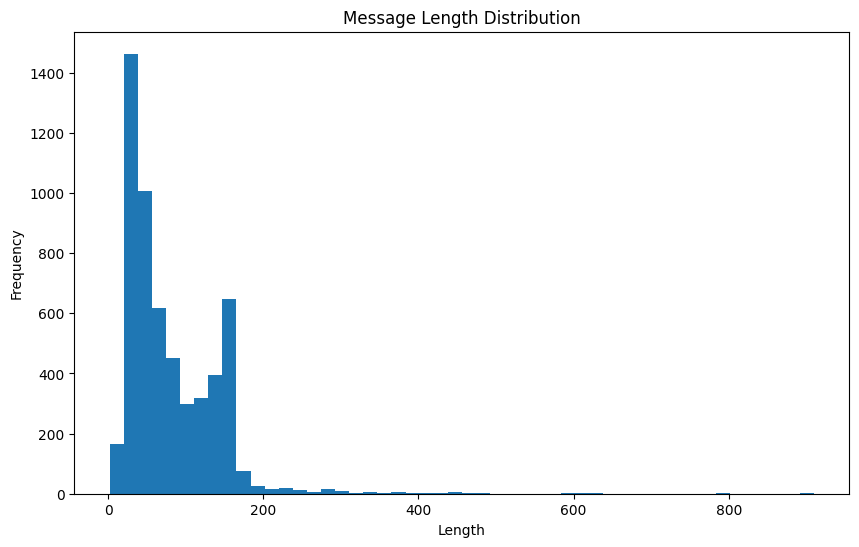

In [35]:
import matplotlib.pyplot as plt

# Plotting message length
plt.figure(figsize=(10, 6))
sms_data['message_length'].plot(kind='hist', bins=50)
plt.title('Message Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


# Precision-Recall Curve

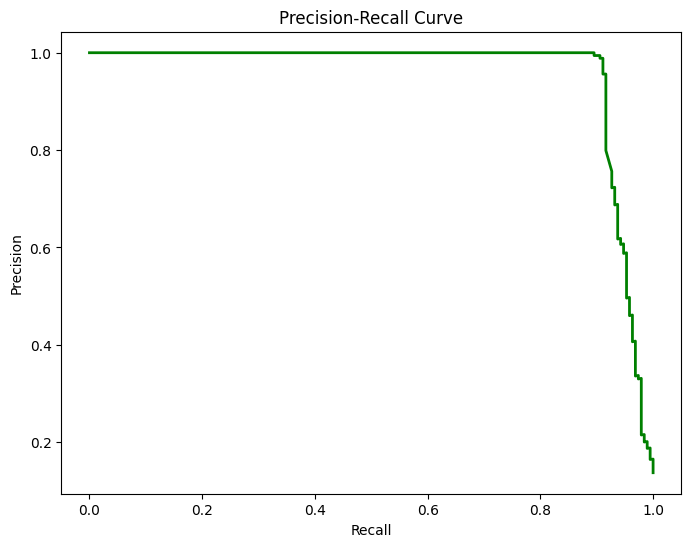

In [41]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test_vectorized)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# ROC Curve

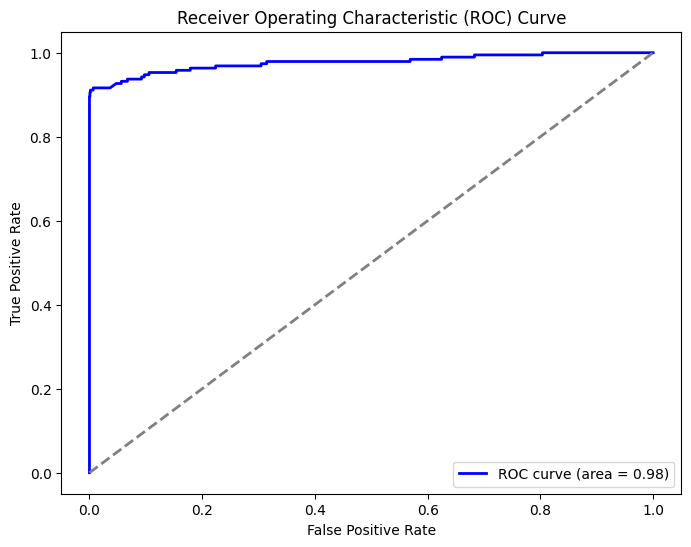

In [42]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_vectorized)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Feature Importance in Naive Bayes

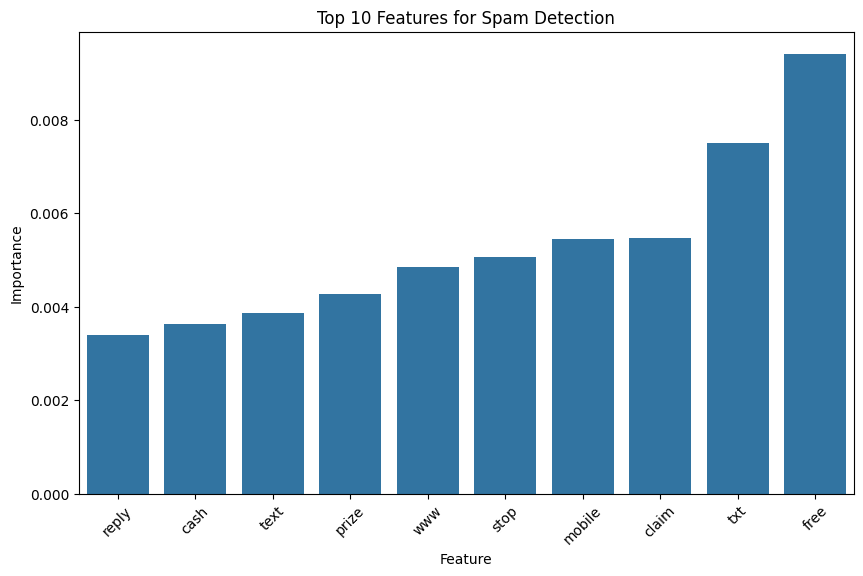

In [43]:
import numpy as np

# Get feature importance
feature_importances = np.exp(model.feature_log_prob_[1]) - np.exp(model.feature_log_prob_[0])

# Top 10 features for spam
top10_idx = np.argsort(feature_importances)[-10:]
top10_features = vectorizer.get_feature_names_out()[top10_idx]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_features, y=feature_importances[top10_idx])
plt.title('Top 10 Features for Spam Detection')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


# Confusion Matrix Visualization

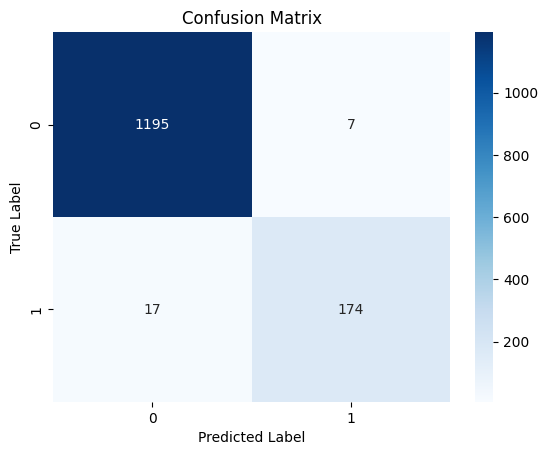

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Visualization of the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
